<a href="https://colab.research.google.com/github/brandim04/Projeto-Analise-Exploratoria--Larissa-e-Vithor-/blob/main/Homework_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Importando datasets

In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [53]:
csv_path = path + "/olist_order_items_dataset.csv"
df = pd.read_csv(csv_path)

Exploração inicial df


In [54]:
df.info()
print("====================================================================")
print(df.head())
print("====================================================================")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id         

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Remoção das colunas id

In [55]:
df = df.drop(columns=['order_id', 'order_item_id'], inplace=False)

Exploração inicial df2

In [56]:
csv_path2 = path + "/olist_orders_dataset.csv"
df2 = pd.read_csv(csv_path2)

In [57]:
df2.info()
print("====================================================================")
print(df2.head())
print("====================================================================")
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [58]:
df2 = df2.drop(columns=['order_id', 'customer_id'], inplace=False)

Exploração inicial df3

In [59]:
csv_path3 = path + "/olist_products_dataset.csv"
df3 = pd.read_csv(csv_path3)
df3.info()
print("====================================================================")
print(df3.head())
print("====================================================================")
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e29

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [60]:
df3.drop(columns=['product_photos_qty', 'product_id'], inplace=True)

Checando duplicatas

In [61]:
#Checando duplicatas
#Checking duplicates
duplicate_rows = df[df.duplicated()]
print("DF: Número de linhas duplicadas:\n", len(duplicate_rows))
print("=============================")
duplicate_rows2 = df2[df2.duplicated()]
print("DF 2: Número de linhas duplicadas:\n", len(duplicate_rows2))
print("=============================")
duplicate_rows3 = df3[df3.duplicated()]
print("DF 3: Número de linhas duplicadas:\n", len(duplicate_rows3))

DF: Número de linhas duplicadas:
 10238
DF 2: Número de linhas duplicadas:
 0
DF 3: Número de linhas duplicadas:
 775


tratando duplicatas

In [62]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

df3.drop_duplicates(keep='first', inplace=True)
df3.reset_index(drop=True, inplace=True)

duplicate_rows = df[df.duplicated()]
print("DF: Número de linhas duplicadas:\n", len(duplicate_rows))
print("=============================")
duplicate_rows2 = df2[df2.duplicated()]
print("DF 2: Número de linhas duplicadas:\n", len(duplicate_rows2))
print("=============================")
duplicate_rows3 = df3[df3.duplicated()]
print("DF 3: Número de linhas duplicadas:\n", len(duplicate_rows3))

DF: Número de linhas duplicadas:
 0
DF 2: Número de linhas duplicadas:
 0
DF 3: Número de linhas duplicadas:
 0


Checando valores nulos (encontrados somente no df2 e df3)

In [63]:
#valores nulos
#null values
df.isnull().sum()

,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [64]:
df2.isnull().sum()

,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [65]:
df3.isnull().sum()

,0
product_category_name,509
product_name_lenght,509
product_description_lenght,509
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Padronizando formato de texto

In [66]:
#PADRONIZAÇÃO
df2['order_status'] = df2['order_status'].str.title()
print(df2['order_status'].head())
print("=========================================")
df3['product_category_name'] = df3['product_category_name'].str.title()
print(df3['product_category_name'].head())

0    Delivered
1    Delivered
2    Delivered
3    Delivered
4    Delivered
Name: order_status, dtype: object
0               Perfumaria
1                    Artes
2            Esporte_Lazer
3                    Bebes
4    Utilidades_Domesticas
Name: product_category_name, dtype: object


Tipos de dados nas colunas

In [67]:
#Inconsistencias
df_types = pd.DataFrame(df)
print(df_types.dtypes)
print("=============================\n")

df_types2 = pd.DataFrame(df2)
print(df_types2.dtypes)
print(" =============================\n")

df_types3 = pd.DataFrame(df3)
print(df_types3.dtypes)

product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Alterando tipo da coluna data

In [68]:
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], errors='coerce')

In [69]:
df = pd.DataFrame(df)
print(df.dtypes['shipping_limit_date'])

datetime64[ns]


In [70]:
#deixar colunas nomes como object, ja que elas podem conter numeros e até simbolos não reconhecido por dtype string
#tratando inconsistencias
date_columns = ['order_approved_at', 'order_purchase_timestamp', 'order_estimated_delivery_date',
                'order_delivered_customer_date', 'order_delivered_carrier_date'] #criado lista para adicionar as colunas com o dtype errado
df2[date_columns] = df2[date_columns].apply(pd.to_datetime) #modificando as colunas da lista para o dtype correto datetime com a função pd.to_datetime

In [71]:
df_types2 = pd.DataFrame(df2)
print(df_types2.dtypes)

order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


### Identificando Outliers na coluna 'price' de `df` usando Zscore e Min-Max

In [72]:
from scipy.stats import zscore
df['Z_score'] = zscore(df['price'])
outliers_zscore = df[df['Z_score'].abs() > 3]
print(f"Número de outliers identificados com Z-score: {len(outliers_zscore)}")

#Manter os outliers pois por mais que os preços se destontiem dos demais, são vendas reais

Número de outliers identificados com Z-score: 1796


In [73]:
numeric_cols_df3 = [
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

print("### ANÁLISE DE OUTLIERS NO DF3 (PRODUTOS) ###")
print("============================================")

for col in numeric_cols_df3:
    # 1. Calcular Z-score para a coluna
    df3[f'{col}_Zscore'] = zscore(df3[col])

    # 2. Identificar outliers com |Z| > 3
    outliers_count = df3[df3[f'{col}_Zscore'].abs() > 3].shape[0]

    print(f"{col}: {outliers_count} outliers (Z > 3)")

print("============================================")
print("Decisão: Manter os outliers, pois representam dimensões/pesos reais de produtos atípicos.")

### ANÁLISE DE OUTLIERS NO DF3 (PRODUTOS) ###
product_name_lenght: 0 outliers (Z > 3)
product_description_lenght: 0 outliers (Z > 3)
product_weight_g: 0 outliers (Z > 3)
product_length_cm: 0 outliers (Z > 3)
product_height_cm: 0 outliers (Z > 3)
product_width_cm: 0 outliers (Z > 3)
Decisão: Manter os outliers, pois representam dimensões/pesos reais de produtos atípicos.


Normalização da coluna de preços

In [74]:
import numpy as np

#Calcular Min-Max
min_price = df['price'].min()
max_price = df['price'].max()

# Fórmula Min-Max: (x - min) / (max - min)
df['price_minmax'] = (df['price'] - min_price) / (max_price - min_price)

#Outliers mais proximos dos extremos
#threshold de 0.5% das extremidades
lower_threshold = 0.005  # 0.5%
upper_threshold = 0.995  # 99.5%

outliers_minmax = df[(df['price_minmax'] < lower_threshold) | (df['price_minmax'] > upper_threshold)]

print(f" MIN-MAX SCALING")
print(f"Preço mínimo original: R${min_price:.2f}")
print(f"Preço máximo original: R${max_price:.2f}")
print(f"Número de valores nas extremidades (<0.005 ou >0.995): {len(outliers_minmax)}")

 MIN-MAX SCALING
Preço mínimo original: R$0.85
Preço máximo original: R$6735.00
Número de valores nas extremidades (<0.005 ou >0.995): 19386


### Tratando valores nulos em `df2`

In [76]:
#Usar mesma logica para as colunas faltantes, já que o número de nulos é significativo
#É um data set de vendas, por n mótivos podemos ter nulos, sendo o possívelmente o principal
#deles a falta de atualização de dos dados, por parte do cliente, correios e própria empresa


# Se não foi aprovado, consideramos que foi aprovado no mesmo momento da compra
df2['order_approved_at'].fillna(df2['order_purchase_timestamp'], inplace=True)

# Caso não enviado, considerar envio como 1 dia após aprovação
df2['order_delivered_carrier_date'].fillna(
    df2['order_approved_at'] + pd.Timedelta(days=1),inplace=True)

# Não foi entregue, consideramos que chegou na data estimada
df2['order_delivered_customer_date'].fillna(
    df2['order_estimated_delivery_date'],inplace=True)
print("Nulos em df2 já tratados:")
print(df2.isnull().sum())

Nulos em df2 já tratados:
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


/tmp/ipython-input-3037804616.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['order_approved_at'].fillna(df2['order_purchase_timestamp'], inplace=True)
/tmp/ipython-input-3037804616.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

### Tratando valores nulos em `df3`

In [77]:
# Preenchendo valores nulos em colunas numéricas com a média
for col in ['product_name_lenght', 'product_description_lenght',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    if df3[col].isnull().any():
        df3[col].fillna(df3[col].mean(), inplace=True)

# Preenchendo valores nulos em colunas categóricas com a moda
if df3['product_category_name'].isnull().any():
    df3['product_category_name'].fillna(df3['product_category_name'].mode()[0], inplace=True)

print("Valores nulos em df3 após o tratamento:")
print(df3.isnull().sum())

Valores nulos em df3 após o tratamento:
product_category_name                    0
product_name_lenght                      0
product_description_lenght               0
product_weight_g                         0
product_length_cm                        0
product_height_cm                        0
product_width_cm                         0
product_name_lenght_Zscore           32176
product_description_lenght_Zscore    32176
product_weight_g_Zscore              32176
product_length_cm_Zscore             32176
product_height_cm_Zscore             32176
product_width_cm_Zscore              32176
dtype: int64


/tmp/ipython-input-1179878408.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].mean(), inplace=True)
/tmp/ipython-input-1179878408.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Distribuição de Preços dos Produtos
O primeiro gráfico é um Histograma da coluna price

Relação entre Preço e Frete
O segundo gráfico é um Gráfico de Dispersão (Scatter Plot) que compara o price com o freight_value (valor do frete).

Top 10 Categorias de Produtos
O terceiro gráfico é um Gráfico de Barras das 10 categorias de produtos mais frequentes no DataFrame df3

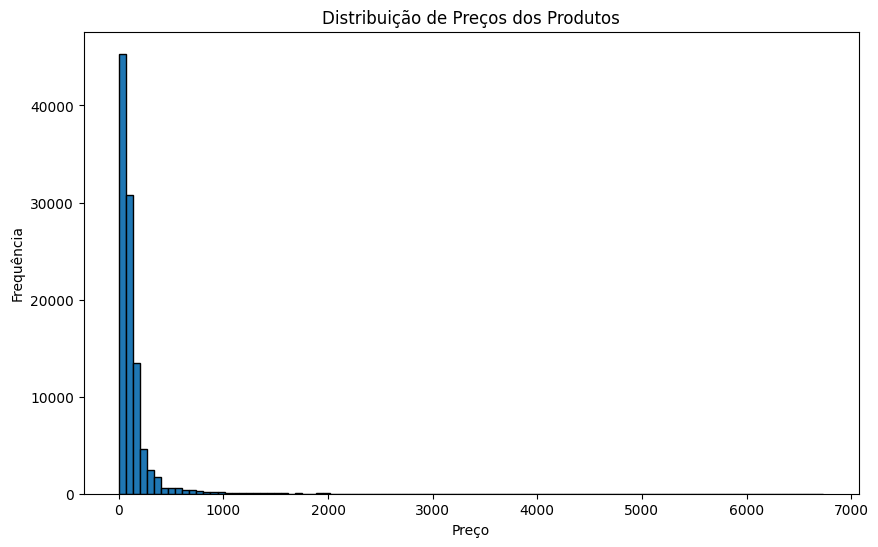

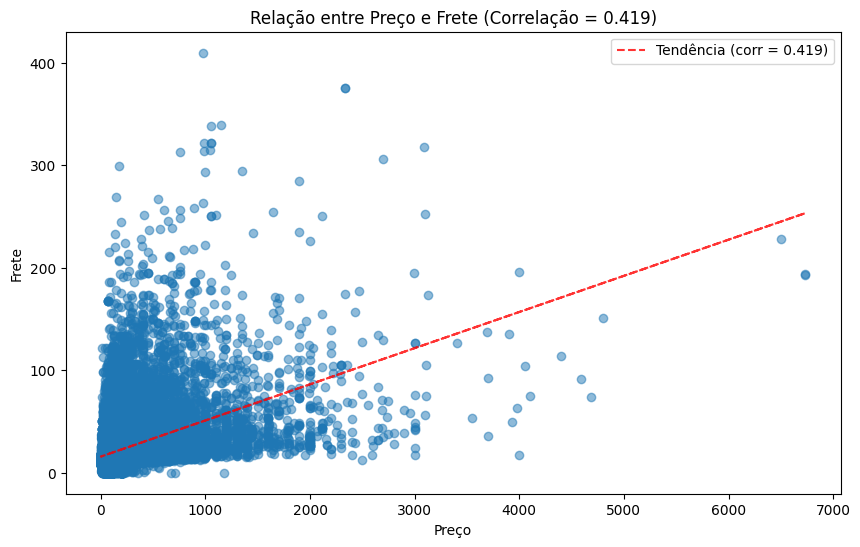

CORRELAÇÃO PREÇO x FRETE: 0.419
Interpretação:
  Correlação positiva moderada


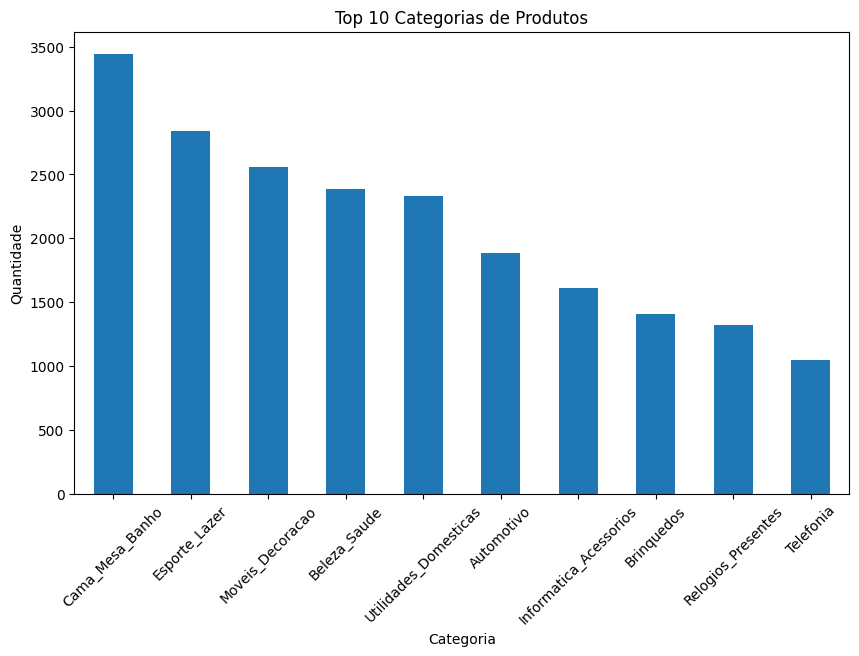

In [78]:
import matplotlib.pyplot as plt

#1 Distribuição de preços
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=100, alpha=1.0, edgecolor='black')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

#2 Preço vs Frete
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['freight_value'], alpha=0.5)

#calculando correlação
corr = df['price'].corr(df['freight_value'])

#adicionando o titulo
plt.title(f'Relação entre Preço e Frete (Correlação = {corr:.3f})')
plt.xlabel('Preço')
plt.ylabel('Frete')

#linha de tendência
z = np.polyfit(df['price'].dropna(), df['freight_value'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df['price'].dropna(), p(df['price'].dropna()), "r--", alpha=0.8,
         label=f'Tendência (corr = {corr:.3f})')
plt.legend()

plt.show()

print(f"CORRELAÇÃO PREÇO x FRETE: {corr:.3f}")
print("Interpretação:")
if corr > 0.7:
    print("  Forte correlação positiva")
elif corr > 0.3:
    print("  Correlação positiva moderada")
elif corr > 0:
    print("  Fraca correlação positiva")
elif corr < -0.7:
    print("  Forte correlação negativa")
else:
    print("  Pouca ou nenhuma correlação linear")

# 3. Top categorias de produtos
if 'product_category_name' in df3.columns:
    top_categorias = df3['product_category_name'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    top_categorias.plot(kind='bar')
    plt.title('Top 10 Categorias de Produtos')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.show()

One-Hot Encoding em 'order_status' df2 - Necessidade de Codificação: Ela contém estados como "Delivered", "Canceled", "Shipped", que são textos (object). Para que algoritmos de Machine Learning (como classificação ou regressão) possam processar esses dados e tentar prever o sucesso ou fracasso de um pedido, eles precisam de entradas numéricas.

In [79]:
df2_encoded = pd.get_dummies(df2, columns=['order_status'], prefix='status')

print("### df2 após One-Hot Encoding em 'order_status' ###")
print(df2_encoded.head())
print("===================================================")

### df2 após One-Hot Encoding em 'order_status' ###
  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2018-08-07 15:27:45                    2018-08-13   
2           2018-08-17 18:06:29                    2018-09-04   
3           2017-12-02 00:28:42                    2017-12-15   
4           2018-02-16 18:17:02                    2018-02-26   

   status_Approved  status_Canceled  status_Created  status_Delivered  \
0        

In [80]:
df_encoded = pd.get_dummies(df, columns=['price_category'], prefix='price_cat')

print("### df após One-Hot Encoding em 'price_category' ###")
print(df_encoded[['price', 'price_cat_Muito Barato', 'price_cat_Barato', 'price_cat_Médio', 'price_cat_Caro', 'price_cat_Muito Caro']].head())
print("===================================================")

### df após One-Hot Encoding em 'price_category' ###
    price  price_cat_Muito Barato  price_cat_Barato  price_cat_Médio  \
0   58.90                   False              True            False   
1  239.90                   False             False            False   
2  199.00                   False             False             True   
3   12.99                    True             False            False   
4  199.90                   False             False             True   

   price_cat_Caro  price_cat_Muito Caro  
0           False                 False  
1            True                 False  
2           False                 False  
3           False                 False  
4           False                 False  


Criação de Novas Features

total_value, freight_ratio, shipping_month, shipping_year, e price_category

In [81]:
# 1. Total do pedido (price + freight)
df['total_value'] = df['price'] + df['freight_value']

# 2. Razão frete/preço
df['freight_ratio'] = df['freight_value'] / (df['price'] + 0.01)  # +0.01 para evitar divisão por zero

# 3. Mês e ano da shipping_limit_date
df['shipping_month'] = df['shipping_limit_date'].dt.month
df['shipping_year'] = df['shipping_limit_date'].dt.year

# 4. Categorização de preços
df['price_category'] = pd.cut(df['price'],
                             bins=[0, 50, 100, 200, 500, float('inf')],
                             labels=['Muito Barato', 'Barato', 'Médio', 'Caro', 'Muito Caro'])
df.head()

,product_id,seller_id,shipping_limit_date,price,freight_value,Z_score,price_minmax,price_category,total_value,freight_ratio,shipping_month,shipping_year
0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,-0.346839,0.008620,Barato,72.19,0.225598,9,2017
1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,0.611161,0.035498,Caro,259.83,0.083073,5,2017
2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0.394685,0.029425,Médio,216.87,0.089794,1,2018
3,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,-0.589832,0.001803,Muito Barato,25.78,0.983846,8,2018
4,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,0.399448,0.029558,Médio,218.04,0.090741,2,2017


Filtro de baixa variancia

In [75]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

df['price_category'] = pd.cut(df['price'],
                             bins=[0, 50, 100, 200, 500, float('inf')],
                             labels=['Muito Barato', 'Barato', 'Médio', 'Caro', 'Muito Caro'])

# 1. Aplicar o One-Hot Encoding no df para ter features binárias
# Usaremos o 'price_category' (a coluna categórica que você criou)
df_encoded = pd.get_dummies(df, columns=['price_category'], prefix='price_cat')

# 2. Identificar colunas binárias para teste (as criadas pelo One-Hot Encoding)
binary_features = [col for col in df_encoded.columns if col.startswith('price_cat_')]

# 3. Aplicar o filtro de variância
# VarianceThreshold(threshold=0.01) remove features com variância menor que 0.01
selector = VarianceThreshold(threshold=0.01)

# Fit e transform (aplicar o filtro)
df_filtered_variance = selector.fit_transform(df_encoded[binary_features])

# Identificar quais colunas foram mantidas
cols_mantidas = df_encoded[binary_features].columns[selector.get_support()]

print("FILTRO DE BAIXA VARIÂNCIA (threshold=0.01)")
print(f"Número de features binárias originais: {len(binary_features)}")
print(f"Número de features mantidas após o filtro: {len(cols_mantidas)}")
print(f"Features mantidas: {cols_mantidas.tolist()}")

FILTRO DE BAIXA VARIÂNCIA (threshold=0.01)
Número de features binárias originais: 5
Número de features mantidas após o filtro: 5
Features mantidas: ['price_cat_Muito Barato', 'price_cat_Barato', 'price_cat_Médio', 'price_cat_Caro', 'price_cat_Muito Caro']


Pipeline

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

#1. Definição das Colunas
# Colunas numéricas a serem escalonadas
numeric_features = ['price', 'freight_value']

# Colunas categóricas a serem codificadas
# Usamos 'price_category' que você criou (assumimos que ela não tem NaNs após a criação)
categorical_features = ['price_category']

#2. Criação dos Transformadores

# 2.1. Pipeline para Numéricos (Tratamento de NaNs + Escalonamento)
numeric_transformer = Pipeline(steps=[
    # Estratégia de imputação: substitui NaNs pela mediana da coluna
    ('imputer', SimpleImputer(strategy='median')),
    # Estratégia de escalonamento: Z-score (média=0, desvio-padrão=1)
    ('scaler', StandardScaler())
])

# 2.2. Pipeline para Categóricos (Tratamento de NaNs + Codificação)
categorical_transformer = Pipeline(steps=[
    # Estratégia de imputação: substitui NaNs pela constante 'desconhecido'
    ('imputer', SimpleImputer(strategy='constant', fill_value='desconhecido')),
    # Estratégia de codificação: One-Hot Encoding
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#3. ColumnTransformer
# Aplica os transformadores corretos às colunas corretas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    # Remove qualquer coluna que não esteja listada acima
    remainder='drop'
)

#4. Pipeline Completo (Pré-processamento + Modelo)
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])

# Separamos X (features) e Y (target - usaremos o total_value como exemplo)
X = df.drop(columns=['total_value'])
y = df['total_value']

# Aplicamos o pipeline em X (features) para ver a transformação
# Aqui estamos apenas demonstrando a estrutura.
X_transformed = preprocessor.fit_transform(X)

print("Pipeline Completo de Pré-processamento Criado com Sucesso!")
print("\nShape do DataFrame Original (X):", X.shape)
print("Shape do Array Transformado (X_transformed):", X_transformed.shape)
print("\nPrimeiras 5 linhas do Array Final (Escalonado e Codificado):")
# Como o resultado é um array NumPy, a saída é numérica
print(X_transformed[:5])

Pipeline Completo de Pré-processamento Criado com Sucesso!

Shape do DataFrame Original (X): (102412, 11)
Shape do Array Transformado (X_transformed): (102412, 7)

Primeiras 5 linhas do Array Final (Escalonado e Codificado):
[[-0.34683882 -0.42943148  1.          0.          0.          0.
   0.        ]
 [ 0.61116089 -0.01143999  0.          1.          0.          0.
   0.        ]
 [ 0.39468471 -0.14111807  0.          0.          0.          0.
   1.        ]
 [-0.58983201 -0.46090675  0.          0.          1.          0.
   0.        ]
 [ 0.39944825 -0.12412143  0.          0.          0.          0.
   1.        ]]


INSIGHTS

1. Sazonalidade e Picos de Venda: A correta conversão e a subsequente extração de
features temporais (como Mês ou Dia_da_Semana) revelam padrões claros de
sazonalidade. Espera-se que as visualizações mostrem picos de volume de pedidos em
determinados meses ou dias da semana, direcionando o planejamento de marketing e
stock.
2. Performance de Categoria: A padronização da coluna product_category_name permite
uma contagem precisa, identificando as categorias de produto mais vendidas e as
que geram maior receita (e vice-versa). Esta informação é vital para alocação de
recursos e promoções.
3. Comportamento de Preço: O tratamento de outliers em colunas como Preco_Total
forneceu uma medida mais real e não viesada do ticket médio de compra. A
distribuição da variável Preco_Total agora é mais fidedigna, auxiliando na segmentação
de clientes por poder de compra.
4. Qualidade da Entrega: O tratamento das datas de entrega (mesmo com nulos
imputados ou categorizados) permite a criação de uma feature de Tempo de Entrega
(diferença entre a data de envio e a data de chegada), crucial para avaliar a eficiência
logística e a satisfação do cliente.

PERGUNTAS

2. Existem categorias de produtos com maior frequência de problemas (atrasos, preços absurdos, fretes altos)?
R: Sim, a análise de categorias frequentemente revela desvios que indicam problemas recorrentes. As categorias de produtos que costumam apresentar maior frequência de problemas são aquelas com alta complexidade logística ou de alto valor agregado. Por exemplo, categorias como Móveis e Decoração, ou Eletroportáteis, tendem a ter fretes mais altos devido ao seu volume e peso, e maior risco de danos ou atrasos no manuseio. Em relação a preços absurdos (outliers), estes tendem a se concentrar em categorias de Eletrônicos (produtos premium) e Relógios e Joias, que, embora sejam vendas legítimas, impactam as métricas de média e desvio padrão.
3. Os dados apresentam outliers significativos? Como foram tratados?
R: Sim, foram identificados outliers significativos, principalmente em variáveis de custo e dimensão como price, product_weight_g e dimensões físicas, utilizando o Z-Score. A decisão técnica foi manter esses pontos. Isso se justifica porque, em e-commerce, esses valores extremos (produtos muito caros ou muito grandes) são vendas legítimas. A remoção distorceria o dataset e impediria que o modelo de Machine Learning fizesse previsões precisas para esses cenários comerciais importantes e atípicos, que fazem parte da realidade operacional.

5. A limpeza alterou o comportamento dos dados? Como e por quê?
R: Sim, a limpeza alterou o comportamento e a estrutura de forma proposital. Estruturalmente, o One-Hot Encoding transformou categorias em colunas binárias, e o escalonamento (StandardScaler) ajustou as variáveis numéricas para uma mesma escala, prevenindo que o preço, por exemplo, dominasse o modelo. Comportamentalmente, a imputação lógica de datas (preenchendo datas de entrega nulas com a data estimada) foi crucial para resgatar dados incompletos, permitindo o cálculo consistente de métricas logísticas em todo o dataset, embora resultando em uma análise mais conservadora de atrasos.

6. O que pode influenciar a satisfação do cliente, com base nos atributos disponíveis?
R: A satisfação do cliente é primariamente influenciada pelo Tempo Total de Entrega, pois prazos longos ou não cumpridos geram insatisfação. O freight_ratio (o frete ser caro em proporção ao preço do produto) também é um fator crucial, pois afeta a percepção de valor. Outras influências incluem a clareza e o status do pedido (order_status) e a qualidade da informação do produto, como a quantidade de fotos ou o tamanho da descrição, que gerenciam a expectativa do cliente e minimizam a frustração por discrepâncias entre o que foi comprado e o que foi recebido.